In [1]:
import pandas as pd
import scipy as stats
from datetime import datetime

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
individual_data= "Pandas Data/sandp500/all_stocks_5yr.csv"
individual_industry= 'Pandas Data/Industries/data/constituents.csv'
dow= "Pandas Data/sandp500/^GSPC.csv"

In [3]:
individual_df = pd.read_csv(individual_data)
industry_df= pd.read_csv(individual_industry)
dow_df=pd.read_csv(dow)

In [4]:
individual_df

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [5]:
industry_df

,Symbol,Name,Sector
0,MMM,3M Company,Industrials
1,AOS,A.O. Smith Corp,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie Inc.,Health Care
4,ACN,Accenture plc,Information Technology
...,...,...,...
500,XYL,Xylem Inc.,Industrials
501,YUM,Yum! Brands Inc,Consumer Discretionary
502,ZBH,Zimmer Biomet Holdings,Health Care
503,ZION,Zions Bancorp,Financials


In [6]:
individual_df.rename(columns={'Name': "Symbol"}, inplace= True)
stocks_df=individual_df.merge(industry_df, on="Symbol")
stocks_df.head(10)

,date,open,high,low,close,volume,Symbol,Name,Sector
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,American Airlines Group,Industrials
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,American Airlines Group,Industrials
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,American Airlines Group,Industrials
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,American Airlines Group,Industrials
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,American Airlines Group,Industrials
5,2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL,American Airlines Group,Industrials
6,2013-02-19,14.33,14.56,14.08,14.26,11354400,AAL,American Airlines Group,Industrials
7,2013-02-20,14.17,14.26,13.15,13.33,14725200,AAL,American Airlines Group,Industrials
8,2013-02-21,13.62,13.95,12.90,13.37,11922100,AAL,American Airlines Group,Industrials
9,2013-02-22,13.57,13.60,13.21,13.57,6071400,AAL,American Airlines Group,Industrials


In [7]:
stocks_df.rename(columns={'date':'Date','open':'Open','high':'High','low':'Low','close':'Close','volume':'Volume'}, inplace= True)

In [8]:
stocks_df['Daily Change'] = stocks_df['Close'] - stocks_df['Open']
max_value=stocks_df["Daily Change"].max()
max_day_profit=stocks_df.loc[(stocks_df['Daily Change']== max_value)]
max_day_profit

,Date,Open,High,Low,Close,Volume,Symbol,Name,Sector,Daily Change
47644,2018-02-06,1361.46,1443.99,1351.79,1442.84,11066819,AMZN,Amazon.com Inc,Consumer Discretionary,81.38


In [9]:
group_by_individual = stocks_df.groupby('Symbol')
daily_max_per_stock=group_by_individual['Daily Change'].max()
stock_daily_max=pd.DataFrame({"Daily Max Per Stock": daily_max_per_stock})
stock_daily_max.sort_values('Daily Max Per Stock', ascending=False)

,Daily Max Per Stock
Symbol,
AMZN,81.380
PCLN,58.650
GOOG,53.420
GOOGL,50.450
HUM,36.030
...,...
KEY,0.880
HST,0.840
AES,0.730


In [10]:
min_value= stocks_df["Daily Change"].min()
max_loss_profit=stocks_df.loc[(stocks_df['Daily Change']== min_value)]
max_loss_profit

,Date,Open,High,Low,Close,Volume,Symbol,Name,Sector,Daily Change
441257,2017-11-07,1746.7,1748.0,1638.1,1645.72,3325104,PCLN,Priceline.com Inc,Consumer Discretionary,-100.98


In [53]:
stocks_df['Date']= pd.to_datetime(stocks_df['Date'])
stocks_df['Week Number']= stocks_df['Date'].dt.week
stocks_df['Year']= stocks_df['Date'].dt.year
stocks_df['Quarter']= stocks_df['Date'].dt.quarter
stocks_df
weekly_change= stocks_df.groupby(['Symbol','Year','Week Number','Name']).agg({'Open':'first','Close':'last'})
weekly_change=weekly_change.reset_index()
weekly_change['Weekly Change'] = weekly_change['Close'] - weekly_change['Open']
weekly_change_max=weekly_change['Weekly Change'].max()
highest_weekly_change= weekly_change.loc[(weekly_change['Weekly Change']== weekly_change_max)]
highest_weekly_change

,Symbol,Year,Week Number,Name,Open,Close,Weekly Change
92094,PCLN,2016,7,Priceline.com Inc,1075.89,1283.74,207.85


In [12]:
week_high_2013= weekly_change.loc[(weekly_change['Week Number']== 10) & (weekly_change['Year']== 2013)]
week_high_2013_max= week_high_2013['Weekly Change'].max()
week_high_2013_max_stock= weekly_change.loc[weekly_change['Weekly Change']== week_high_2013_max]
week_high_2013_max_stock

,Symbol,Year,Week Number,Name,Open,Close,Weekly Change
91940,PCLN,2013,10,Priceline.com Inc,694.55,720.92,26.37


In [13]:
week_high_2014= weekly_change.loc[(weekly_change['Week Number']== 34) & (weekly_change['Year']== 2014)]
week_high_2014_max= week_high_2014['Weekly Change'].max()
week_high_2014_max_stock= weekly_change.loc[weekly_change['Weekly Change']== week_high_2014_max]
week_high_2014_max_stock

,Symbol,Year,Week Number,Name,Open,Close,Weekly Change
5078,AGN,2014,34,"Allergan, Plc",216.51,227.31,10.8


In [14]:
week_high_2015= weekly_change.loc[(weekly_change['Week Number']== 23) & (weekly_change['Year']== 2015)]
week_high_2015_max= week_high_2015['Weekly Change'].max()
week_high_2015_max_stock= weekly_change.loc[weekly_change['Weekly Change']== week_high_2015_max]
week_high_2015_max_stock

,Symbol,Year,Week Number,Name,Open,Close,Weekly Change
100509,REGN,2015,23,Regeneron,517.08,539.4,22.32


In [15]:
week_high_2016= weekly_change.loc[(weekly_change['Week Number']== 38) & (weekly_change['Year']== 2016)]
week_high_2016_max= week_high_2016['Weekly Change'].max()
week_high_2016_max_stock= weekly_change.loc[weekly_change['Weekly Change']== week_high_2016_max]
week_high_2016_max_stock

,Symbol,Year,Week Number,Name,Open,Close,Weekly Change
10143,AMZN,2016,38,Amazon.com Inc,779.97,805.75,25.78


In [16]:
week_high_2017= weekly_change.loc[(weekly_change['Week Number']== 46) & (weekly_change['Year']== 2017)]
week_high_2017_max= week_high_2017['Weekly Change'].max()
week_high_2017_max_stock= weekly_change.loc[weekly_change['Weekly Change']== week_high_2017_max]
week_high_2017_max_stock

,Symbol,Year,Week Number,Name,Open,Close,Weekly Change
92185,PCLN,2017,46,Priceline.com Inc,1688.4,1747.22,58.82


In [46]:
stocks_df['Date']= pd.to_datetime(stocks_df['Date'])
stocks_df['Month Number']= stocks_df['Date'].dt.month
stocks_df
monthly_change_old= stocks_df.groupby(['Symbol','Year','Month Number','Sector','Name']).agg({'Open':'first','Close':'last'})
monthly_change=monthly_change_old.reset_index()
monthly_change["Monthly Change"]= monthly_change['Close'] - monthly_change['Open']
monthly_change_group=monthly_change.groupby(["Sector","Year","Month Number"])["Monthly Change"].mean()

In [47]:
stocks_month = pd.DataFrame(monthly_change_group)
stocks_month = stocks_month.reset_index()
year_month_df=pd.DataFrame({'year': stocks_month['Year'], 'month': stocks_month['Month Number'], 'day':[1 for x in range(671)]})
stocks_month['Year-Month']= pd.to_datetime(year_month_df)
stocks_month

,Sector,Year,Month Number,Monthly Change,Year-Month
0,Consumer Discretionary,2013,2,0.097999,2013-02-01
1,Consumer Discretionary,2013,3,2.510669,2013-03-01
2,Consumer Discretionary,2013,4,2.108521,2013-04-01
3,Consumer Discretionary,2013,5,2.704583,2013-05-01
4,Consumer Discretionary,2013,6,0.554804,2013-06-01
...,...,...,...,...,...
666,Utilities,2017,10,2.241071,2017-10-01
667,Utilities,2017,11,1.584286,2017-11-01
668,Utilities,2017,12,-4.409643,2017-12-01
669,Utilities,2018,1,-2.013929,2018-01-01


In [48]:
monthly_change

,Symbol,Year,Month Number,Sector,Name,Open,Close,Monthly Change
0,A,2013,2,Health Care,Agilent Technologies Inc,45.07,41.48,-3.59
1,A,2013,3,Health Care,Agilent Technologies Inc,41.18,41.97,0.79
2,A,2013,4,Health Care,Agilent Technologies Inc,41.83,41.44,-0.39
3,A,2013,5,Health Care,Agilent Technologies Inc,41.42,45.45,4.03
4,A,2013,6,Health Care,Agilent Technologies Inc,45.65,42.76,-2.89
...,...,...,...,...,...,...,...,...
30007,ZTS,2017,10,Health Care,Zoetis,63.84,63.82,-0.02
30008,ZTS,2017,11,Health Care,Zoetis,64.20,72.29,8.09
30009,ZTS,2017,12,Health Care,Zoetis,72.22,72.04,-0.18
30010,ZTS,2018,1,Health Care,Zoetis,72.54,76.73,4.19


In [52]:
monthly_change_max=monthly_change['Monthly Change'].max()
monthly_change.loc[(monthly_change['Monthly Change']== monthly_change_max)]



,Symbol,Year,Month Number,Sector,Name,Open,Close,Monthly Change
2368,AMZN,2018,1,Consumer Discretionary,Amazon.com Inc,1172.0,1450.89,278.89


In [21]:
month_list= stocks_month['Year-Month'].tolist()
calender=['January 2015','February','March','April','May','June','July','August','September','October','November','December',
         'January 2016','February','March','April','May','June','July','August','September','October','November','December',
         'January 2017','February','March','April','May','June','July','August','September','October','November','December',
         'January 2018','February','March','April','May','June','July','August','September','October','November','December',
         'January 2019','February','March','April','May','June','July','August','September','October','November','December']

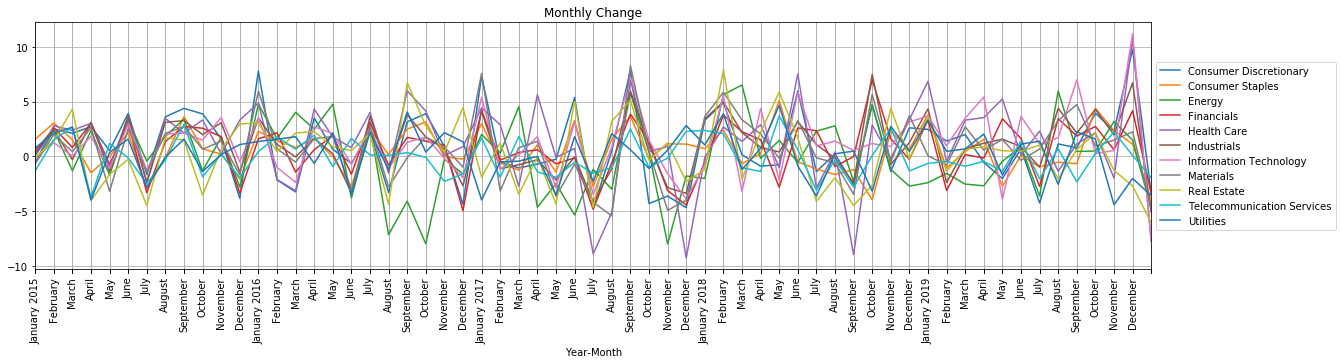

In [68]:
stocks_month.head()
stocks_month=stocks_month.groupby(['Sector','Year-Month'])['Monthly Change'].mean()

stocks_b = pd.DataFrame(stocks_month)
stocks_b =stocks_b.unstack(level=0)
stocks_b.columns = stocks_b.columns.droplevel()
stocks_b = stocks_b.reset_index()
stocks_b.set_index("Year-Month",inplace= True)
stocks_b

fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(2,1,1)
stocks_b.plot(ax=ax1)

ax1.set_title('Monthly Change')
ax1,plt.xticks(month_list,calender,rotation=90)
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax1.grid()
# plt.tight_layout()

In [23]:
quarterly_change= stocks_df.groupby(['Symbol','Year','Quarter','Sector']).agg({'Open':'first','Close':'last'})
quarterly_change['Quarterly Change'] = quarterly_change['Close'] - quarterly_change['Open']
quarterly_change=quarterly_change.reset_index()
stocks_quarter=pd.DataFrame(quarterly_change)
stocks_quarter

,Symbol,Year,Quarter,Sector,Open,Close,Quarterly Change
0,A,2013,1,Health Care,45.07,41.97,-3.10
1,A,2013,2,Health Care,41.83,42.76,0.93
2,A,2013,3,Health Care,43.05,51.25,8.20
3,A,2013,4,Health Care,50.70,57.19,6.49
4,A,2014,1,Health Care,57.10,55.92,-1.18
...,...,...,...,...,...,...,...
10335,ZTS,2017,1,Health Care,53.88,53.37,-0.51
10336,ZTS,2017,2,Health Care,53.35,62.38,9.03
10337,ZTS,2017,3,Health Care,62.40,63.76,1.36
10338,ZTS,2017,4,Health Care,63.84,72.04,8.20


In [24]:
stocks_quarter["Year-Quarter"]= stocks_quarter['Year'].astype(str)+ " Q: "+ stocks_quarter['Quarter'].astype(str)
quarter_list= stocks_quarter['Year-Quarter'].tolist()

In [25]:
stocks_quarter_g= stocks_quarter.groupby(['Sector','Year-Quarter'])['Quarterly Change'].mean()
stocks_quarter_graph_index= pd.DataFrame(stocks_quarter_g)
stocks_quarter_graph_index = stocks_quarter_graph_index.unstack(level=0)
stocks_quarter_graph_index = stocks_quarter_graph_index.reset_index()
stocks_quarter_graph_index.columns = stocks_quarter_graph_index.columns.droplevel()
stocks_quarter_graph_index.set_index("", inplace= True)
stocks_quarter_graph_index

Sector,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Telecommunication Services,Utilities
,,,,,,,,,,,
2013 Q: 1,2.372086,4.471719,1.410000,2.693000,2.284724,2.702912,0.999690,0.924087,1.097879,-0.033333,2.790714
2013 Q: 2,5.157759,-0.086112,-0.953871,3.178752,4.345013,1.227058,0.670151,-0.454696,-1.695152,0.070000,-1.023393
2013 Q: 3,7.400515,-0.059515,6.767419,2.393027,6.037083,5.745448,4.641732,4.402043,-2.227576,-3.045000,-0.828750
2013 Q: 4,10.159653,4.580709,4.047903,7.176075,5.942943,8.200371,7.348825,5.017522,-0.988485,1.466667,0.590000
2014 Q: 1,0.741678,1.222527,2.932097,-0.336735,5.404193,2.119178,1.302288,4.344870,6.040000,-0.193333,3.865000
2014 Q: 2,1.169617,2.322576,11.051935,1.180814,3.101042,1.866218,2.532227,2.932870,5.290000,1.710000,3.300714
2014 Q: 3,-1.307343,0.234139,-8.987419,0.622858,4.025972,-0.936027,0.602869,-2.737261,-1.674242,1.930000,-2.440000
2014 Q: 4,7.860742,5.080858,-12.557581,3.998758,9.635390,5.993959,2.411881,2.388739,9.716667,-1.863333,6.387143
2015 Q: 1,2.611744,2.175758,1.503548,-0.982939,8.704890,0.613579,2.383165,3.553696,3.989697,-1.586667,-3.215000


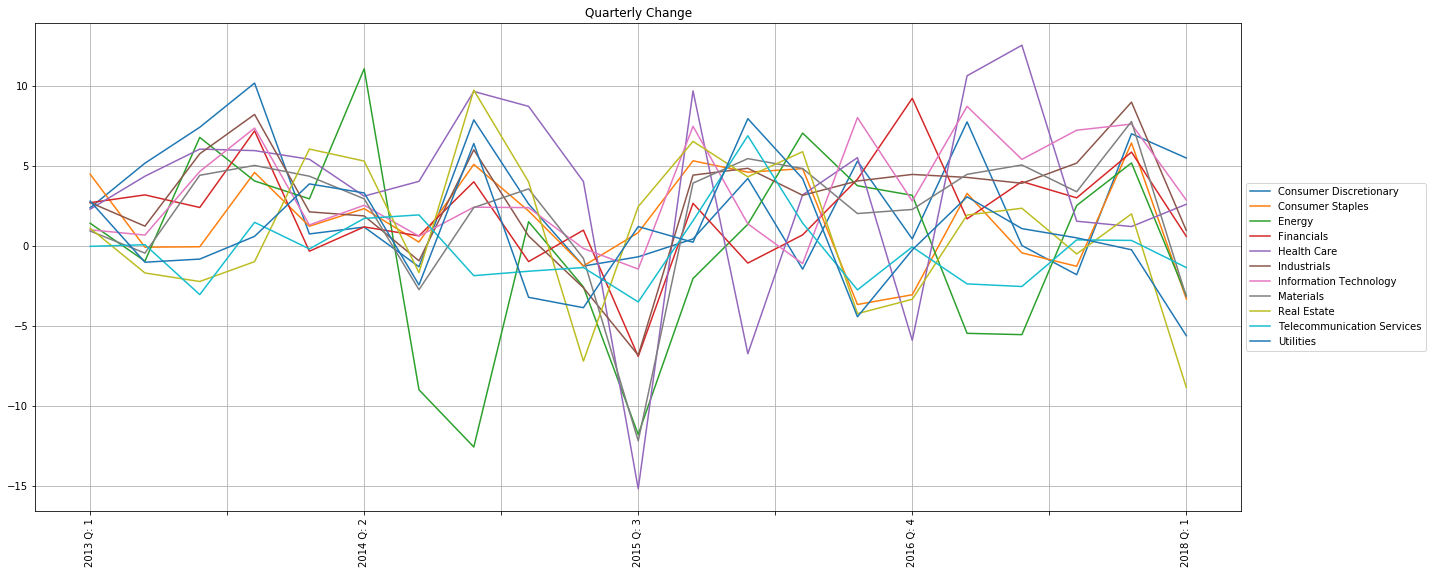

In [26]:
fig = plt.figure(figsize = (20,15))
ax1 = fig.add_subplot(2,1,1)

stocks_quarter_graph_index.plot(ax=ax1)

ax1.set_title('Quarterly Change')
ax1,plt.xticks(label= quarter_list,rotation=90)
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))


ax1.grid()
plt.tight_layout()

In [27]:
dow_df['Date']= pd.to_datetime(dow_df['Date'])
dow_df['Month Number']= dow_df['Date'].dt.month
dow_df['Year'] = dow_df['Date'].dt.year
dow_df
monthly_change_dow= dow_df.groupby(['Year','Month Number']).agg({'Open':'first','Close':'last'})

monthly_change_dow=monthly_change_dow.reset_index()
monthly_change_dow["Monthly Change"]= monthly_change_dow['Close']- monthly_change_dow['Open']
monthly_change_dow["Year-Month"]= pd.to_datetime(year_month_df)

In [66]:
dow_graph_old= pd.DataFrame({"Year-Month":monthly_change_dow["Year-Month"],"Monthly Change":monthly_change_dow['Monthly Change']})
dow_graph= dow_graph_old.set_index("Year-Month")
dow_graph

,Monthly Change
Year-Month,
2013-02-01,5.290039
2013-03-01,54.509887
2013-04-01,28.389892
2013-05-01,33.189941
2013-06-01,-25.429932
...,...
2017-10-01,54.060059
2017-11-01,64.370117
2017-12-01,28.510009


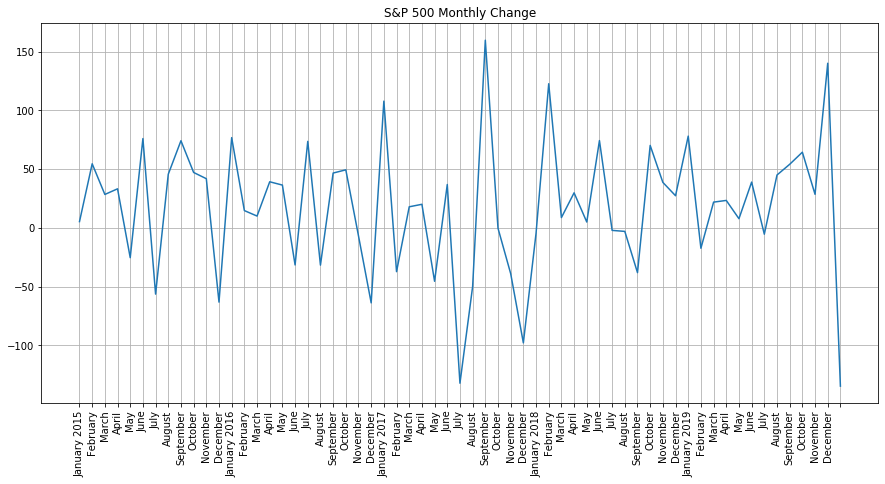

In [67]:
fig=plt.figure(figsize=(15,7))
ax= np.arange(len(dow_graph))
plt.plot(ax, dow_graph)
plt.title('S&P 500 Monthly Change')
plt.xticks(ax,calender,rotation=90)
plt.grid()

In [30]:
stocks_df['Sector'].value_counts()

Consumer Discretionary        102403
Information Technology         83664
Industrials                    82960
Financials                     82681
Health Care                    75757
Consumer Staples               42116
Real Estate                    41531
Energy                         39181
Utilities                      35242
Materials                      29728
Telecommunication Services      3777
Name: Sector, dtype: int64

In [31]:
correlation_counts=[]

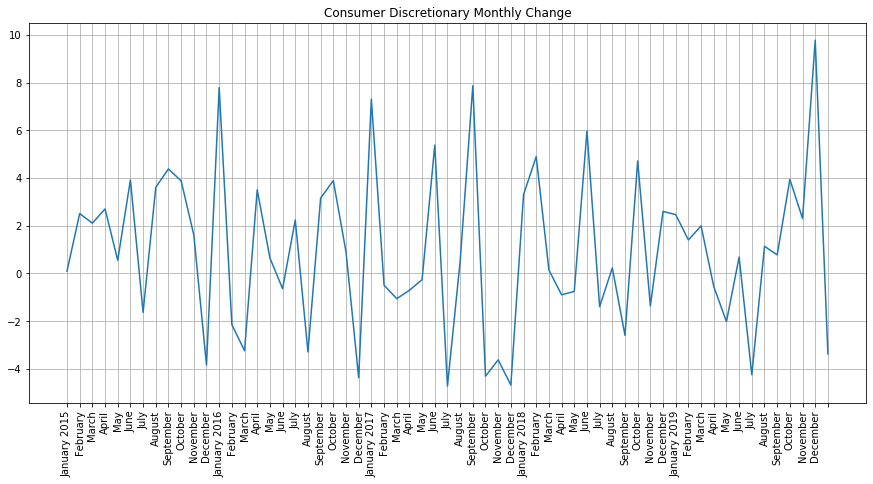

In [32]:
cd_df= stocks_b['Consumer Discretionary']
consumer_discretionary= pd.DataFrame(cd_df)

fig=plt.figure(figsize=(15,7))
ax= np.arange(len(consumer_discretionary))
plt.plot(ax, consumer_discretionary)
plt.title('Consumer Discretionary Monthly Change')
plt.xticks(ax,calender,rotation=90)
plt.grid()

cd_count=consumer_discretionary.corrwith(dow_graph['Monthly Change'])
correlation_counts.append(cd_count)

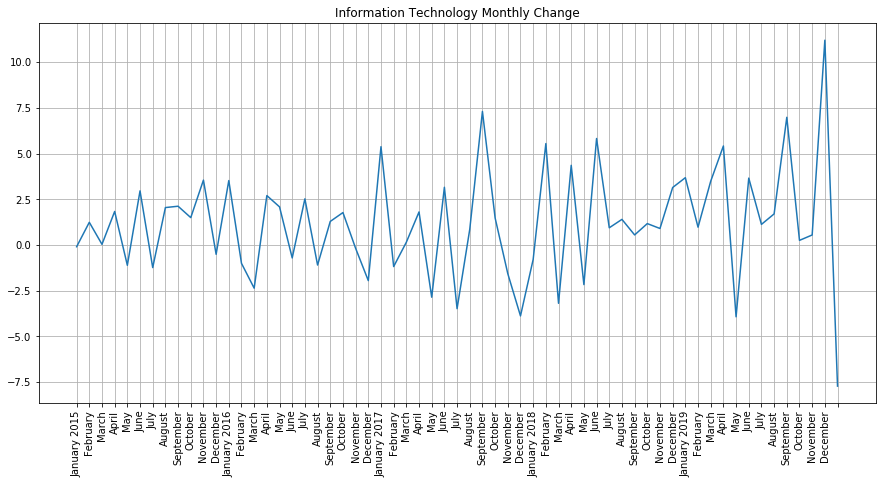

In [33]:
it_df= stocks_b['Information Technology']
information_technology=pd.DataFrame(it_df)

fig=plt.figure(figsize=(15,7))
ax= np.arange(len(information_technology))
plt.plot(ax, information_technology)
plt.title('Information Technology Monthly Change')
plt.xticks(ax,calender,rotation=90)
plt.grid()

it_count=information_technology.corrwith(dow_graph['Monthly Change'])
correlation_counts.append(it_count)

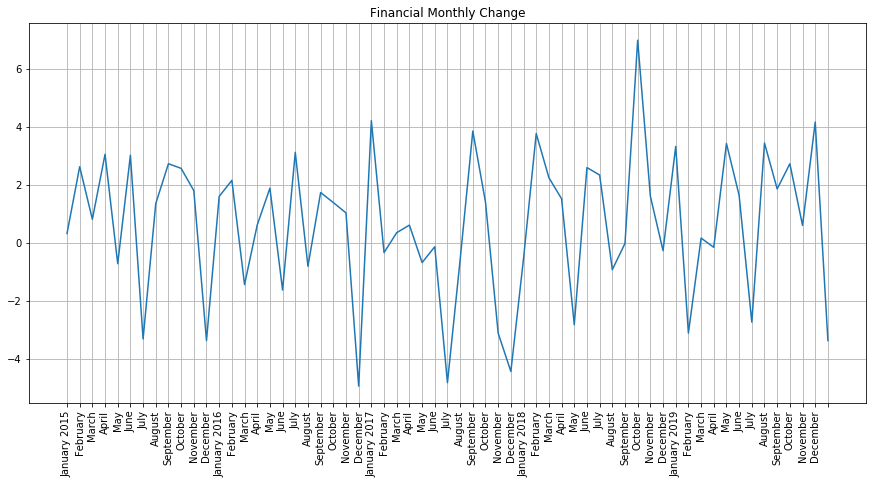

In [34]:
f_df= stocks_b['Financials']
financial=pd.DataFrame(f_df)

fig=plt.figure(figsize=(15,7))
ax= np.arange(len(financial))
plt.plot(ax, financial)
plt.title('Financial Monthly Change')
plt.xticks(ax,calender,rotation=90)
plt.grid()

f_count= financial.corrwith(dow_graph['Monthly Change'])
correlation_counts.append(f_count)

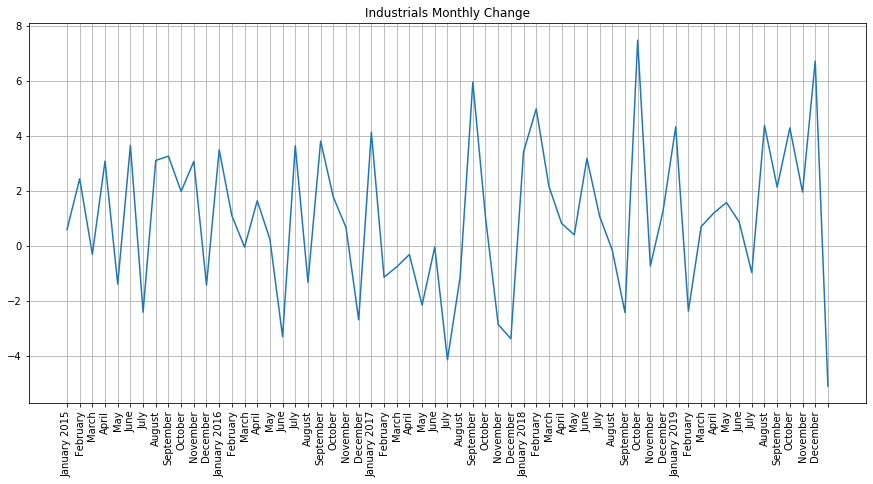

In [35]:
i_df= stocks_b['Industrials']
industrials=pd.DataFrame(i_df)

fig=plt.figure(figsize=(15,7))
ax= np.arange(len(industrials))
plt.plot(ax, industrials)
plt.title('Industrials Monthly Change')
plt.xticks(ax,calender,rotation=90)
plt.grid()

i_count= industrials.corrwith(dow_graph['Monthly Change'])
correlation_counts.append(i_count)

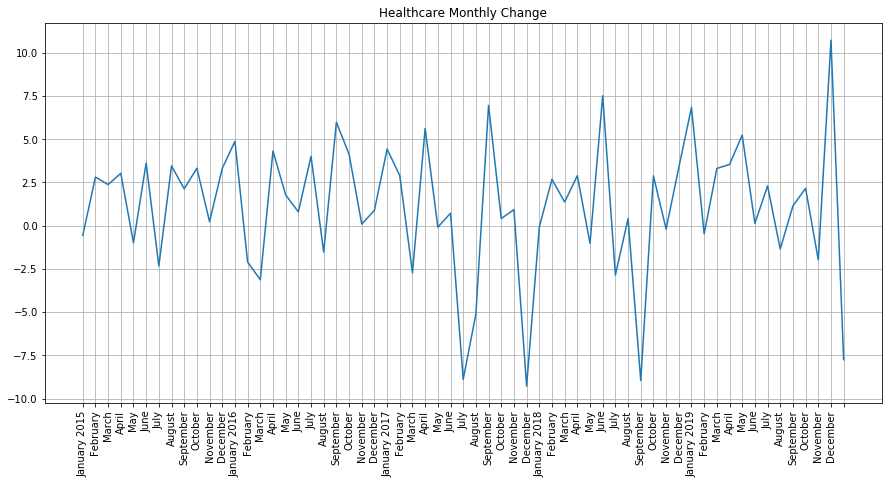

In [36]:
healthcare= stocks_b['Health Care']
healthcare= pd.DataFrame(healthcare)

fig=plt.figure(figsize=(15,7))
ax= np.arange(len(healthcare))
plt.plot(ax, healthcare)
plt.title('Healthcare Monthly Change')
plt.xticks(ax,calender,rotation=90)
plt.grid()

h_count=healthcare.corrwith(dow_graph['Monthly Change'])
correlation_counts.append(h_count)

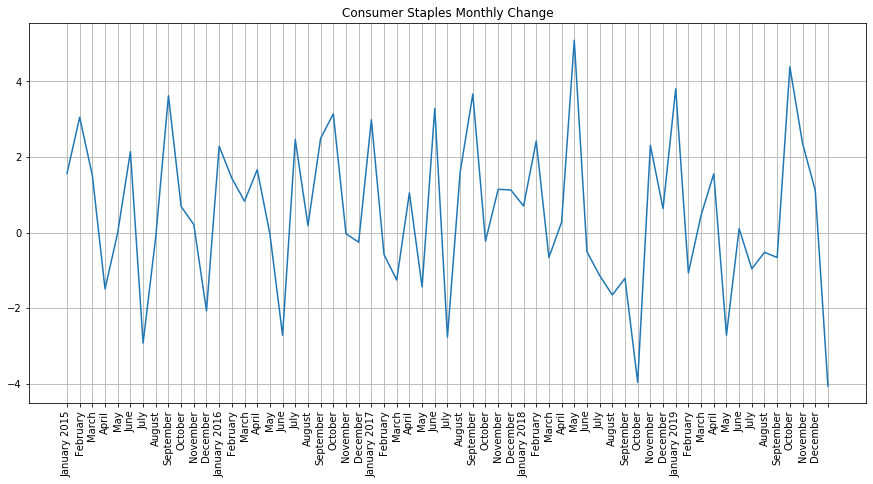

In [37]:
cs_df= stocks_b['Consumer Staples']
consumer_staples=pd.DataFrame(cs_df)

fig=plt.figure(figsize=(15,7))
ax= np.arange(len(consumer_staples))
plt.plot(ax, consumer_staples)
plt.title('Consumer Staples Monthly Change')
plt.xticks(ax,calender,rotation=90)
plt.grid()

cs_count= consumer_staples.corrwith(dow_graph["Monthly Change"])
correlation_counts.append(cs_count)

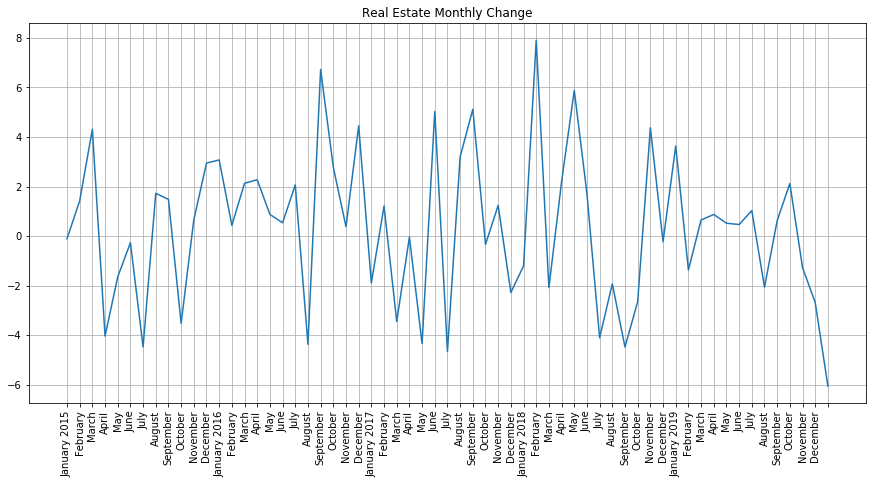

In [38]:
re_df= stocks_b['Real Estate']
real_estate=pd.DataFrame(re_df)

fig=plt.figure(figsize=(15,7))
ax= np.arange(len(real_estate))
plt.plot(ax, real_estate)
plt.title('Real Estate Monthly Change')
plt.xticks(ax,calender,rotation=90)
plt.grid()

re_count=real_estate.corrwith(dow_graph['Monthly Change'])
correlation_counts.append(re_count)

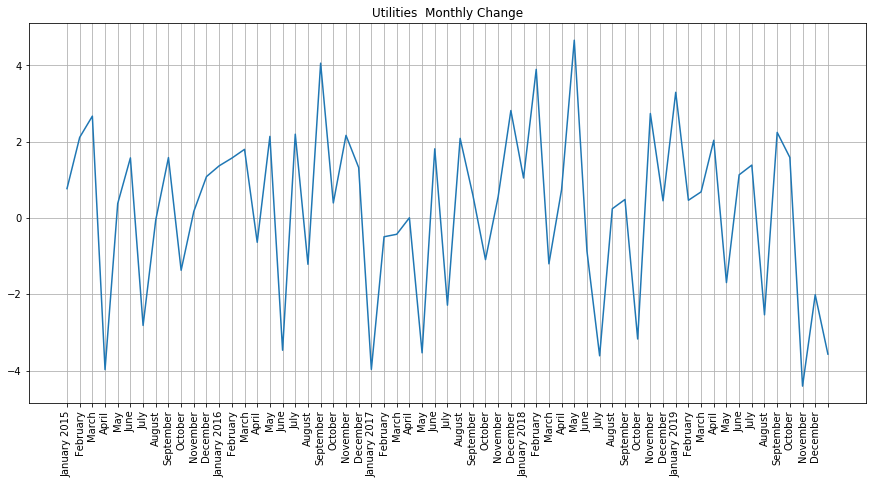

In [39]:
u_df= stocks_b['Utilities']
utilities=pd.DataFrame(u_df)

fig=plt.figure(figsize=(15,7))
ax= np.arange(len(utilities))
plt.plot(ax, utilities)
plt.title('Utilities  Monthly Change')
plt.xticks(ax,calender,rotation=90)
plt.grid()

u_count=utilities.corrwith(dow_graph['Monthly Change'])
correlation_counts.append(u_count)

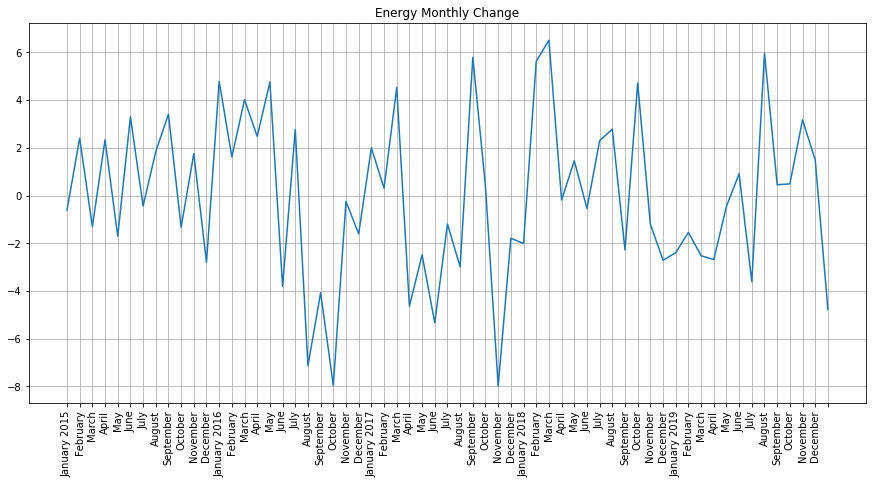

In [40]:
e_df= stocks_b['Energy']
energy=pd.DataFrame(e_df)

fig=plt.figure(figsize=(15,7))
ax= np.arange(len(energy))
plt.plot(ax, energy)
plt.title('Energy Monthly Change')
plt.xticks(ax,calender,rotation=90)
plt.grid()

e_count= energy.corrwith(dow_graph['Monthly Change'])
correlation_counts.append(e_count)

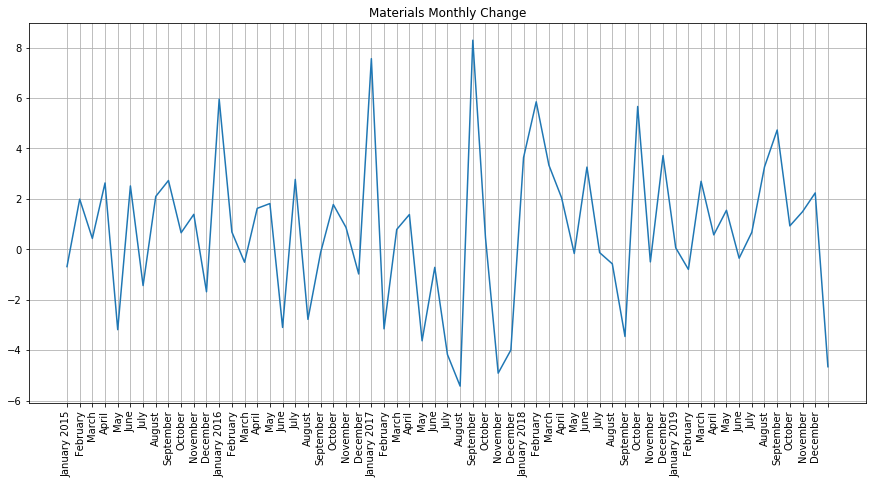

In [41]:
m_df= stocks_b['Materials']
materials=pd.DataFrame(m_df)

fig=plt.figure(figsize=(15,7))
ax= np.arange(len(materials))
plt.plot(ax, materials)
plt.title('Materials Monthly Change')
plt.xticks(ax,calender,rotation=90)
plt.grid()

m_count= materials.corrwith(dow_graph['Monthly Change'])
correlation_counts.append(m_count)

In [42]:
correlation_df=pd.DataFrame(correlation_counts)

In [43]:
correlation_df

,Consumer Discretionary,Information Technology,Financials,Industrials,Health Care,Consumer Staples,Real Estate,Utilities,Energy,Materials
0,0.818871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.80623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,0.833391,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,0.889908,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,0.740477,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,0.558884,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,0.411288,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.177982,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.481689,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.822294


In [64]:
dow_df

,Date,Open,High,Low,Close,Adj Close,Volume,Month Number,Year
0,2013-02-08,1509.390015,1518.310059,1509.390015,1517.930054,1517.930054,2986150000,2,2013
1,2013-02-11,1517.930054,1518.310059,1513.609985,1517.010010,1517.010010,2684100000,2,2013
2,2013-02-12,1517.010010,1522.290039,1515.609985,1519.430054,1519.430054,3414370000,2,2013
3,2013-02-13,1519.430054,1524.689941,1515.930054,1520.329956,1520.329956,3385880000,2,2013
4,2013-02-14,1520.329956,1523.140015,1514.020020,1521.380005,1521.380005,3759740000,2,2013
...,...,...,...,...,...,...,...,...,...
1254,2018-02-01,2816.449951,2835.959961,2812.699951,2821.979980,2821.979980,3938450000,2,2018
1255,2018-02-02,2808.919922,2808.919922,2759.969971,2762.129883,2762.129883,4301130000,2,2018
1256,2018-02-05,2741.060059,2763.389893,2638.169922,2648.939941,2648.939941,5283460000,2,2018
1257,2018-02-06,2614.780029,2701.040039,2593.070068,2695.139893,2695.139893,5891660000,2,2018


Text(0.5, 1.0, 'S&P 500 Growth')

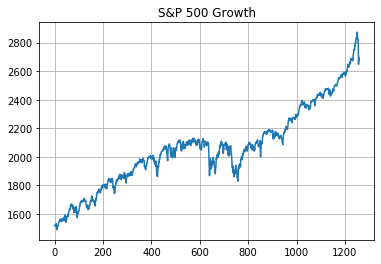

In [65]:
dow_df["Adj Close"].plot(grid=True)
plt.title("S&P 500 Growth")

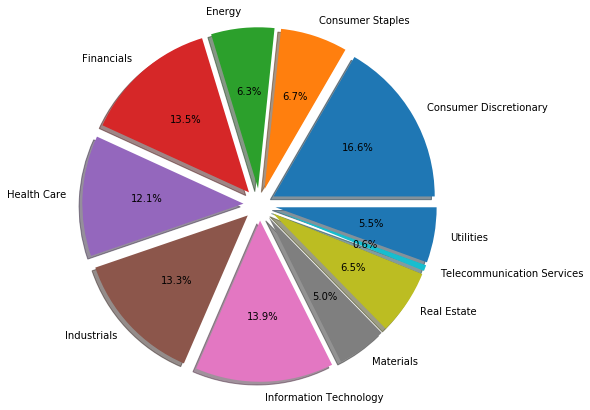

In [75]:
industry_df_sector= industry_df.groupby('Sector')
sector_each= industry_df_sector.count()
sector_each= sector_each.reset_index()
sector_each
plt.figure(figsize=(7,7))
plt.pie(sector_each['Symbol'],labels=sector_each["Sector"], autopct='%1.1f%%',
       shadow= True, explode= (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.axis('equal')
plt.show()